In [1]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from Helper_Code import *

In [2]:
# Uploading the DataSet
DataFrames = UploadDataSet(base_directory="dataframes_list.pkl.gz")

In [3]:
X, Y = IndexToLocation(DataFrames, np.arange(18000))
X = X.values.reshape(150, 120)
Y = Y.values.reshape(150, 120)

In [4]:
DataFrames[0]

,X,Y,U,V,Ux,Uy,Vx,Vy,vor,Umean,Vmean,Urms,Vrms,ufluc,wfluc,V16,V17
0,0.314097,33.0326,3.46271,0.064536,-47.48990,99.7924,-74.9919,-44.9309,-174.7840,0.0,0.0,0.0,0.0,-0.269271,0.034541,450.314,0.558501
1,0.942293,33.0326,3.48953,0.013280,15.09410,60.6287,-92.4775,-18.0366,-153.1060,0.0,0.0,0.0,0.0,-0.255965,-0.020072,450.942,0.562828
2,1.535590,33.0326,3.50999,-0.018973,-27.05100,130.7770,-73.8357,21.3053,-204.6120,0.0,0.0,0.0,0.0,-0.238435,-0.050661,451.536,0.566128
3,2.128890,33.0326,3.50074,-0.057691,-7.20450,210.1000,-27.1359,56.5126,-237.2360,0.0,0.0,0.0,0.0,-0.245486,-0.087106,452.129,0.564635
4,2.722180,33.0326,3.45467,-0.068517,-4.44727,213.8220,18.4878,47.1953,-195.3340,0.0,0.0,0.0,0.0,-0.291523,-0.098783,452.722,0.557205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,86.549700,-32.9978,3.12049,0.117108,211.47100,214.5260,148.8580,194.3390,-65.6682,0.0,0.0,0.0,0.0,-0.166139,0.090287,536.550,0.503305
17996,87.142900,-32.9978,3.19540,0.200734,-59.11520,430.0830,62.3087,280.0960,-367.7750,0.0,0.0,0.0,0.0,-0.073013,0.178854,537.143,0.515388
17997,87.736100,-32.9978,3.02203,0.270963,-15.18650,770.1350,59.6885,331.3610,-710.4470,0.0,0.0,0.0,0.0,-0.241682,0.251439,537.736,0.487425
17998,88.329300,-32.9978,2.81474,0.214140,-6.64627,1037.3900,-37.8643,473.3800,-1075.2500,0.0,0.0,0.0,0.0,-0.439731,0.198363,538.329,0.453990


In [5]:
# Initialize variables to track global maximum and minimum
global_max = float('-inf')  # Initialize to negative infinity
global_min = float('inf')   # Initialize to positive infinity

# Iterate through all frames to find global maximum and minimum
for frame in DataFrames:
    vor = frame['vor'].values
    frame_max = np.max(vor)
    frame_min = np.min(vor)
    if frame_max > global_max:
        global_max = frame_max
    if frame_min < global_min:
        global_min = frame_min

print("Global Maximum Vorticity:", global_max)
print("Global Minimum Vorticity:", global_min)

Global Maximum Vorticity: 3278.09
Global Minimum Vorticity: -4027.97


In [6]:
max_vor = max(np.abs(global_min), global_max)
max_vor

4027.97

In [9]:
val = 15
##########################
threshold1 = val*max_vor/100

##########################
print(f"The Threshold Value: {threshold1}")

The Threshold Value: 604.1954999999999


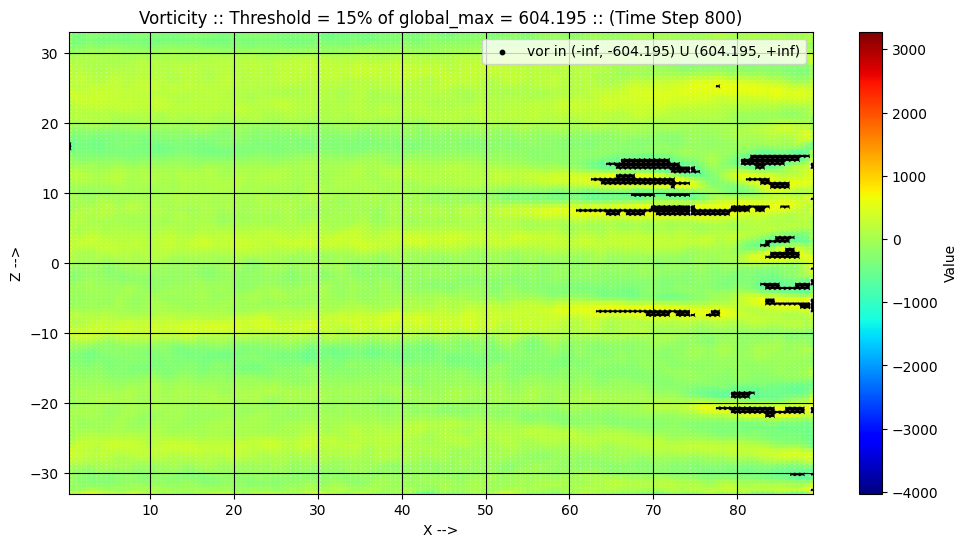

In [10]:
# Create a function to update the plot for each frame
def update_plot(i):
    plt.clf()  # Clear the previous plot
    vor = DataFrames[i]['vor'].values.reshape(150, 120)
    
    mask_above_threshold = (vor <  -threshold1) | (vor > threshold1)
    mask_below_threshold = (vor >= -threshold1) & (vor <= threshold1)
    
    sc_above = plt.scatter(X[mask_above_threshold], Y[mask_above_threshold], c='black', s=10, label=f'vor in (-inf, {-threshold1.round(3)}) U ({threshold1.round(3)}, +inf)')
    sc_below = plt.scatter(X[mask_below_threshold], Y[mask_below_threshold], c=vor[mask_below_threshold], cmap='jet', s=10, vmin=np.min(global_min), vmax=np.max(global_max))
    
    plt.colorbar(sc_below, label='Value')
    plt.title(f'Vorticity :: Threshold = {val}% of global_max = {threshold1.round(3)} :: (Time Step {i+1})')
    plt.xlabel('X -->')
    plt.ylabel('Z -->')
    plt.legend(loc='upper right')
    plt.grid(True, color='k')
    
    plt.xlim(np.min(X), np.max(X))
    plt.ylim(np.min(Y), np.max(Y))

# Create the animation
fig = plt.figure(figsize=(12, 6))
ani = animation.FuncAnimation(fig, update_plot, frames=800, repeat=False)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=8, metadata=dict(artist='Me'), bitrate=1800)

# Save the animation as an mp4 file
ani.save(f'Animations/Vor_animation_Threshold_{val}.mp4', writer=writer, dpi = 400)

plt.show()


The Threshold Value: 200


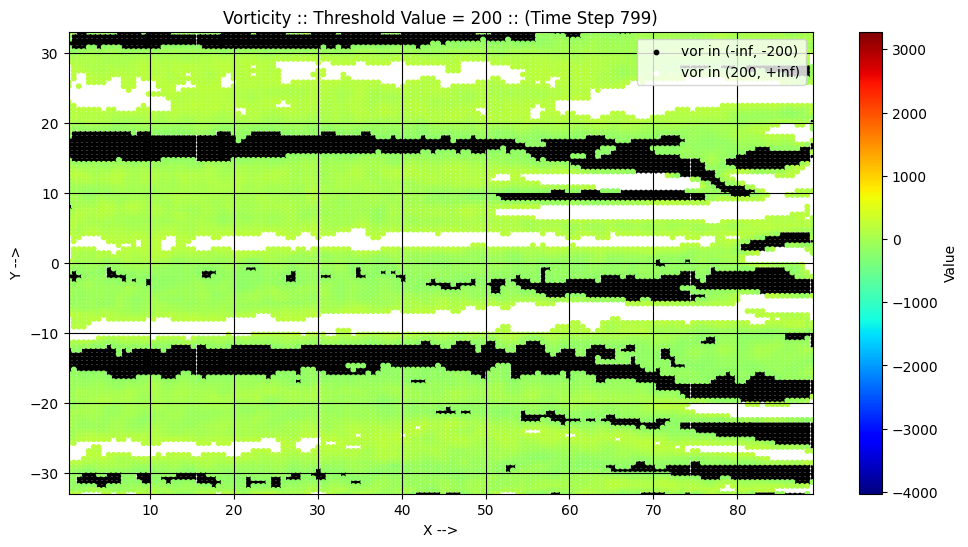

In [8]:
##########################
threshold1 = 200
##########################
print(f"The Threshold Value: {threshold1}")


# Create a function to update the plot for each frame
def update_plot(i):
    plt.clf()  # Clear the previous plot
    vor = DataFrames[i]['vor'].values.reshape(150, 120)
    
    mask_above_threshold1 = (vor <  -threshold1)
    mask_above_threshold2 = (vor > threshold1)
    mask_below_threshold = (vor >= -threshold1) & (vor <= threshold1)
    
    sc_above1 = plt.scatter(X[mask_above_threshold1], Y[mask_above_threshold1], c='black', s=10, label=f'vor in (-inf, {-threshold1})')
    sc_above2 = plt.scatter(X[mask_above_threshold2], Y[mask_above_threshold2], c ='white',s=10, label=f'vor in ({threshold1}, +inf)')
    sc_below = plt.scatter(X[mask_below_threshold], Y[mask_below_threshold], c=vor[mask_below_threshold], cmap='jet', s=10, vmin=np.min(global_min), vmax=np.max(global_max))
    
    plt.colorbar(sc_below, label='Value')
    plt.title(f'Vorticity :: Threshold Value = {threshold1} :: (Time Step {i})')
    plt.xlabel('X -->')
    plt.ylabel('Y -->')
    plt.legend(loc='upper right')
    plt.grid(True, color='k')
    
    plt.xlim(np.min(X), np.max(X))
    plt.ylim(np.min(Y), np.max(Y))

# Create the animation
fig = plt.figure(figsize=(12, 6))
ani = animation.FuncAnimation(fig, update_plot, frames=800, repeat=False)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=8, metadata=dict(artist='Me'), bitrate=1800)

# Save the animation as an mp4 file
ani.save(f'Animations/Vor_animation_Threshold_{threshold1}_2.mp4', writer=writer, dpi = 400)

plt.show()
